In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [2]:
# Load scraped data
df = pd.read_csv('scraped_data/BABE_scraped.csv')

df['content'] = df['content'].str.lower() # Avoid repeated words

df.head()

,Unnamed: 0,url,content,type_class
0,0,https://www.foxnews.com/entertainment/australi...,"""orange is the new black"" star yael stone is r...",2
1,1,https://www.alternet.org/2020/06/law-and-order...,mark twain's instruction to curious residents ...,0
2,2,https://www.nbcnews.com/news/latino/after-step...,it wasn't the content of white house adviser s...,0
3,3,https://www.alternet.org/2019/07/fox-news-has-...,donald trump thinks white nationalism is going...,0
4,4,https://www.alternet.org/2019/08/a-new-low-was...,"on saturday, august 3, el paso became the scen...",0


In [3]:
# Tokenize
tokenizer = Tokenizer(num_words=5000) # adjustable
df['content'] = df['content'].astype(str)
tokenizer.fit_on_texts(df['content'])

sequences = tokenizer.texts_to_sequences(df['content'])
max_sequence_length = 500

# Training data
X = pad_sequences(sequences, maxlen=max_sequence_length)
y = df['type_class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# RUN THIS IF RETRAINING TO WIPE BACKEND WEIGHTS 
# do not need to run on first run

from tensorflow.keras import backend as K
K.clear_session()

In [6]:
# BASE LSTM
# Use this model to experiment with other architectures

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

num_classes = 3
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

# initialize callback to avoid overfitting
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=3,   
    min_delta=0.001,   
    verbose=1,           
    restore_best_weights=True 
)

# Model architecture
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128))
#model.add(LSTM(128, return_sequences=False))
model.add(Bidirectional(LSTM(128))) # Bidirectional model seems to perform slightly worse, however data sample size was very small when tested
model.add(Dense(num_classes, activation='softmax'))  

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Training
history = model.fit(X_train, 
                    y_train_one_hot, 
                    epochs=10, 
                    batch_size=16, 
                    validation_data=(X_test, y_test_one_hot), 
                    callbacks=[early_stopping])

# Eval
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Test Accuracy: {accuracy:.2f}')


Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 21s 237ms/step - accuracy: 0.5479 - loss: 0.9161 - val_accuracy: 0.7301 - val_loss: 0.5998
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 366ms/step - accuracy: 0.8551 - loss: 0.3788 - val_accuracy: 0.8313 - val_loss: 0.5059
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 31s 382ms/step - accuracy: 0.9759 - loss: 0.1004 - val_accuracy: 0.8589 - val_loss: 0.5699
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 31s 384ms/step - accuracy: 0.9934 - loss: 0.0230 - val_accuracy: 0.8436 - val_loss: 0.6319
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 32s 387ms/step - accuracy: 0.9994 - loss: 0.0034 - val_accuracy: 0.8528 - val_loss: 0.6419
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.8514 - loss: 0.4617
Test Accuracy: 0.83


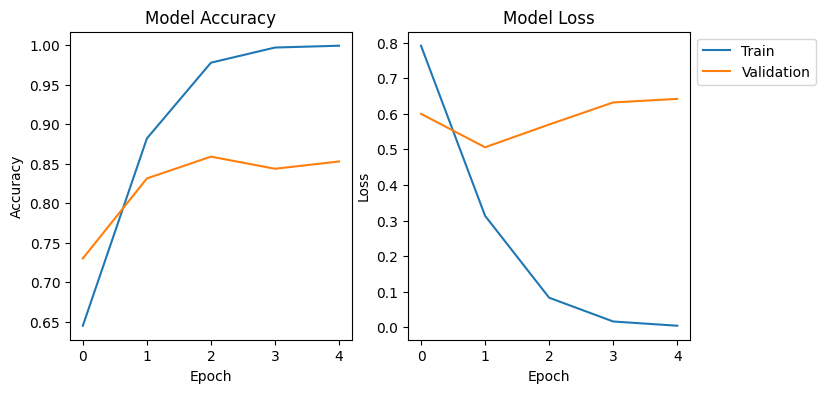

In [7]:
import matplotlib.pyplot as plt


# Accuracy plot
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)  # First subplot in a 1x2 grid
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Loss plot
plt.subplot(1, 2, 2)  # Second subplot in a 1x2 grid
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [20]:
fox_news = pd.read_csv('top_publishers/fox_data.csv')
fox_news['text'] = fox_news['text'].str.lower()
print("FOX NEWS DATA:")
print(fox_news.head())

npr_news = pd.read_csv('top_publishers/npr_data.csv')
npr_news['text'] = npr_news['text'].str.lower()
print("\nNPR NEWS DATA:")
print(npr_news.head())

nytimes_news = pd.read_csv('top_publishers/nytimes_data.csv')
nytimes_news['text'] = nytimes_news['text'].str.lower()
print("\nNYTIMES NEWS DATA:")
print(nytimes_news.head())

washingtonpost_news = pd.read_csv('top_publishers/washingtonpost_data.csv')
washingtonpost_news['text'] = washingtonpost_news['text'].str.lower()
print("\nWASHINGTON POST NEWS DATA:")
print(washingtonpost_news.head())

washingtontimes_news = pd.read_csv('top_publishers/washingtontimes_data.csv')
washingtontimes_news['text'] = washingtontimes_news['text'].str.lower()
print("\nWASHINGTON TIMES DATA:")
print(washingtontimes_news.head())

FOX NEWS DATA:
   Unnamed: 0                                                url  label  \
0           0  https://www.foxnews.com/opinion/charlie-kirk-s...      2   
1           1  https://www.foxnews.com/politics/white-house-h...      2   
2           2  https://www.foxnews.com/us/why-those-ice-raids...      2   
3           3  https://www.foxnews.com/opinion/jim-hanson-rep...      2   
4           4  https://www.foxnews.com/health/trump-executive...      2   

                                                text  
0  on feb. 1, 1960, four black college students s...  
1  president trump on thursday hosted several hun...  
2  starting sunday, immigration and customs enfor...  
3  according to a report in the wall street journ...  
4  president donald trump signed an executive ord...  

NPR NEWS DATA:
   Unnamed: 0.1  Unnamed: 0  \
0            45          45   
1            71          71   
2            85          85   
3            88          88   
4            91          91   

 

In [28]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define a function to perform prediction and store labels
def predict_and_store_labels(news_df, model, tokenizer, max_sequence_length):
    # Preprocess the text data
    sequences = tokenizer.texts_to_sequences(news_df['text'])
    X = pad_sequences(sequences, maxlen=max_sequence_length)
    
    # Predict labels using the trained LSTM model
    predicted_labels = model.predict(X)
    
    # Convert predicted probabilities to class labels
    predicted_classes = np.argmax(predicted_labels, axis=1)
    
    # Store predicted labels in a numpy array
    return np.array(predicted_classes)

# Create empty NumPy arrays to store predicted labels
predicted_labels_fox = np.array([])
predicted_labels_npr = np.array([])
predicted_labels_nytimes = np.array([])
predicted_labels_washingtonpost = np.array([])
predicted_labels_washingtontimes = np.array([])

# Perform prediction and store labels for each news DataFrame
predicted_labels_fox = predict_and_store_labels(fox_news, model, tokenizer, max_sequence_length)
predicted_labels_npr = predict_and_store_labels(npr_news, model, tokenizer, max_sequence_length)
predicted_labels_nytimes = predict_and_store_labels(nytimes_news, model, tokenizer, max_sequence_length)
predicted_labels_washingtonpost = predict_and_store_labels(washingtonpost_news, model, tokenizer, max_sequence_length)
predicted_labels_washingtontimes = predict_and_store_labels(washingtontimes_news, model, tokenizer, max_sequence_length)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


In [29]:
print(predicted_labels_fox)

[0 2 2 0 2 2 2 0 2 2 2 2 2 2 2 1 0 0 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 0 2 2 2 2 0 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2
 0 0 2 2 1 2 2 2 2 2 0 2 2 0 0 0 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2 2 0 2 2 0 2
 2 2 2 0 2 0 2 2 0 1 0 2 2 2 0 2 0 2 2 2 1 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2
 0 2 0 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 2 0 2 0 0 0 0 2 0 0 0 0 2 2 2
 0 2 0 0 2 2 2 2 2 2 2 0 2 0 2 2 0 0 2 0 0 2 2 2 0 0 2 0 0 2 0 2 2 2 0 0 2
 2 2 0 2 0 0 0 2 2 0 0 2 2 0 2 2 2 0 0 2 2 2 2 2 0 0 2 0 2 2 0 0 2 2 0 0 2
 2 0 0 0 0 2 2 2 2 0 1 2 2 2 2 2 0 2 0 0 2 2 2 2 0 2 2 2 2 0 2 0 2 0 1 0 0
 2 0 2 0 2 0 2 0 0 0 0 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 0 2 2 2 2 2 0 0 0 2 2
 2 0 0 0 0 2 2 2 0 2 2 0 2 2 2 2 2 2 0 0 2 0 2 2 2 2 2 0 2 0 0 0 2 0 2 2 2
 2 0 0 2 2 2 0 2 2 0 0 0 2 2 0 1 2 2 0 2 2 2 2 2 2 2 2 2 0 0 1 2 2 2 2 2 2
 2 0 0 2 0 2 2 2 0 2 2 2 0 0 0 2 2 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2
 2 2 2 2 0 2 2 2 0 2 2 0 2 2 2 2 0 0 2 0 2 2 0 2 0 1 2 2 2 0 2 0 0 2 2 2 2
 2 2 2 0 2 0]


In [30]:
def int_to_str_labels(int_labels):
    str_labels = np.where(int_labels == 0, 'Left', np.where(int_labels == 1, 'Center', 'Right'))
    return str_labels

# Convert integer labels to string labels for each news source
str_labels_fox = int_to_str_labels(predicted_labels_fox)
str_labels_npr = int_to_str_labels(predicted_labels_npr)
str_labels_nytimes = int_to_str_labels(predicted_labels_nytimes)
str_labels_washingtonpost = int_to_str_labels(predicted_labels_washingtonpost)
str_labels_washingtontimes = int_to_str_labels(predicted_labels_washingtontimes)


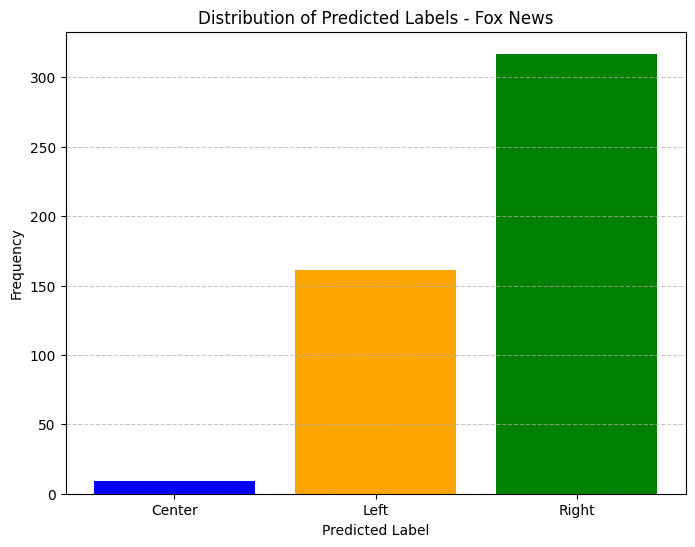

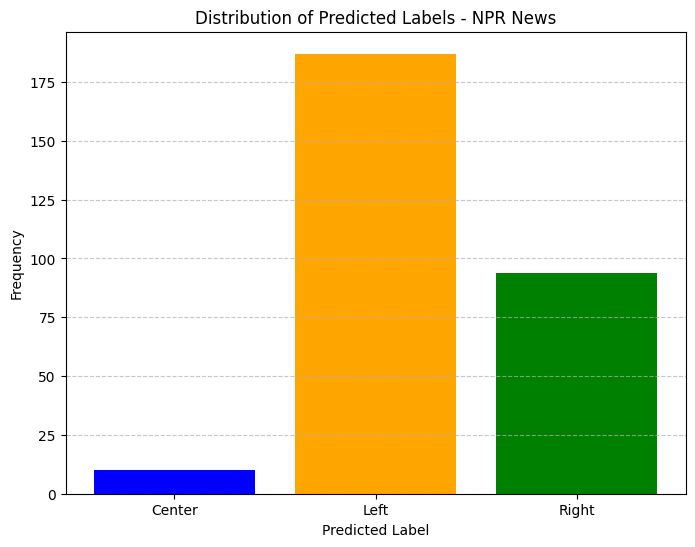

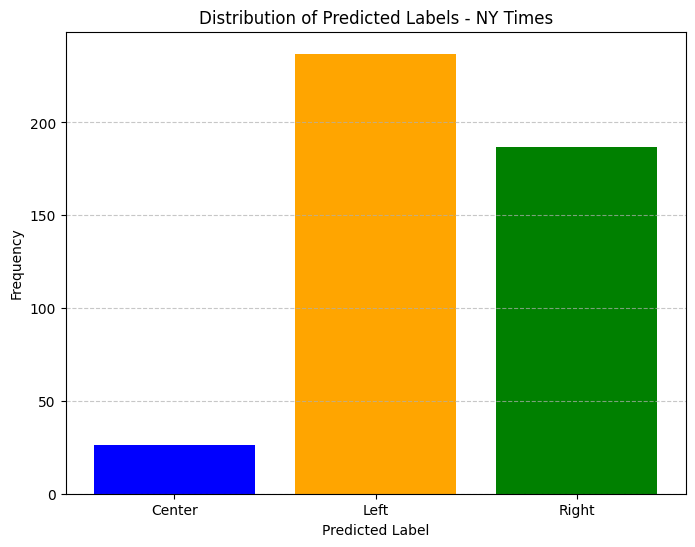

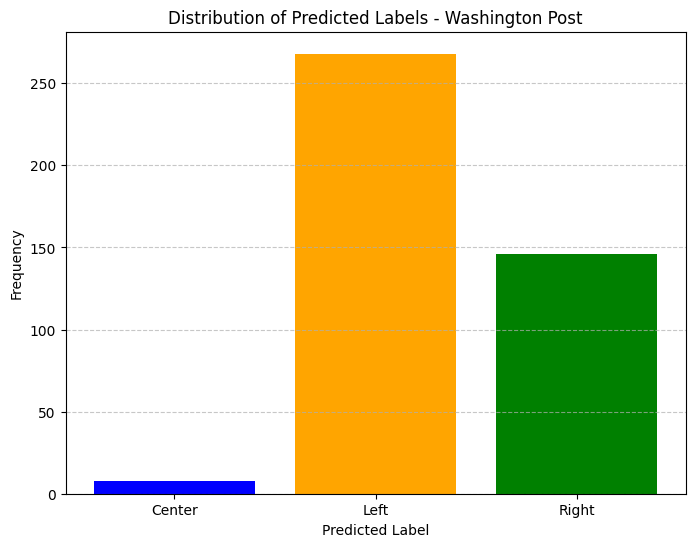

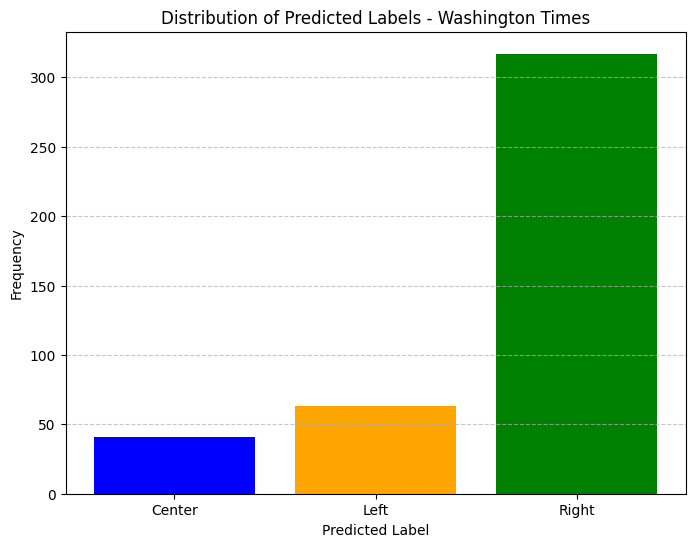

In [32]:
import matplotlib.pyplot as plt

# Define a function to plot the distribution of predicted labels
def plot_label_distribution(str_labels_array, title):
    labels, counts = np.unique(str_labels_array, return_counts=True)
    plt.figure(figsize=(8, 6))
    plt.bar(labels, counts, color=['blue', 'orange', 'green'])
    plt.xlabel('Predicted Label')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot the distribution for each news source
plot_label_distribution(str_labels_fox, 'Distribution of Predicted Labels - Fox News')
plot_label_distribution(str_labels_npr, 'Distribution of Predicted Labels - NPR News')
plot_label_distribution(str_labels_nytimes, 'Distribution of Predicted Labels - NY Times')
plot_label_distribution(str_labels_washingtonpost, 'Distribution of Predicted Labels - Washington Post')
plot_label_distribution(str_labels_washingtontimes, 'Distribution of Predicted Labels - Washington Times')
